# CIFAR-10 DATA VISUALISATION

In this part we will take a look at the data we are using. We focus on the following questions:
- What does our data look like?
- What distribution does this data undergo?
- Analytics of the tabular representation of our data.
- Searching for NULL or missing values.
- Normalization and Standartization processes
- Sketching analytical graphs.

## Analytics of the normalized and augmented data

First we load all the necessary modules, such as:
- pandas - for tabular data representation
- numpy - multy dim. array calculations
- torch - multy dim. tesnor calculations

In [2]:
import torch
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from data_cifar_10 import train_loader, validation_loader, test_loader

100%|██████████| 170498071/170498071 [00:23<00:00, 7371795.34it/s]


Extracting ./data_preparation/CIFAR_10/cifar_10_data\cifar-10-python.tar.gz to ./data_preparation/CIFAR_10/cifar_10_data
Files already downloaded and verified


Loading 1000 samples from DataLoaders (after data augmentation, and standartizaion were performed)

In [6]:
small_batch_images = []
small_batch_labels = []

count = 0
for images, labels in train_loader:
    small_batch_images.append(images)
    small_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_sample = torch.cat(small_batch_images)[:1000]
y_sample = torch.cat(small_batch_labels)[:1000]

red_pixels   = X_sample[:, 0, :, :]
green_pixels = X_sample[:, 1, :, :]
blue_pixels  = X_sample[:, 2, :, :]

red_image   = red_pixels.cpu().numpy().flatten()
green_image = green_pixels.cpu().numpy().flatten()
blue_image  = blue_pixels.cpu().numpy().flatten()

In [7]:
val_batch_images = []
val_batch_labels = []

count = 0
for images, labels in validation_loader:
    val_batch_images.append(images)
    val_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_val = torch.cat(val_batch_images)[:1000]
y_val = torch.cat(val_batch_labels)[:1000]


In [8]:
test_batch_images = []
test_batch_labels = []

count = 0
for images, labels in test_loader:
    test_batch_images.append(images)
    test_batch_labels.append(labels)
    
    count += images.size(0)
    if count >= 1000: 
        break

X_test = torch.cat(test_batch_images)[:1000]
y_test = torch.cat(test_batch_labels)[:1000]

Defining a dictionary of classes:

In [9]:
cifar10_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

These are the mean and std values that we will use to denormalize the images (just to show few examples):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9450980317592621].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000236034394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..1.0000000076293944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.8352941024303436].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.053115898461357e-09..0.9254902420043946].


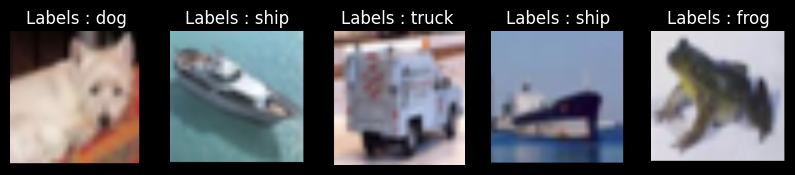

In [10]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.figure(figsize=(10,5))
for i in range(5) :
  plt.subplot(1,5,i+1)
  img = X_sample[i].permute(1, 2, 0).numpy()
  img = (std * (img) + mean) 

  plt.axis("off")
  plt.title(f"Labels : {cifar10_labels[y_sample[i].item()]}")
  plt.imshow(img)
plt.show()

We confirmed that our "fine" labels (e.g., 'apple', 'aquarium_fish') match the images.

Pixel intensity distribution (after loading it from train_loader) for 1000 samples

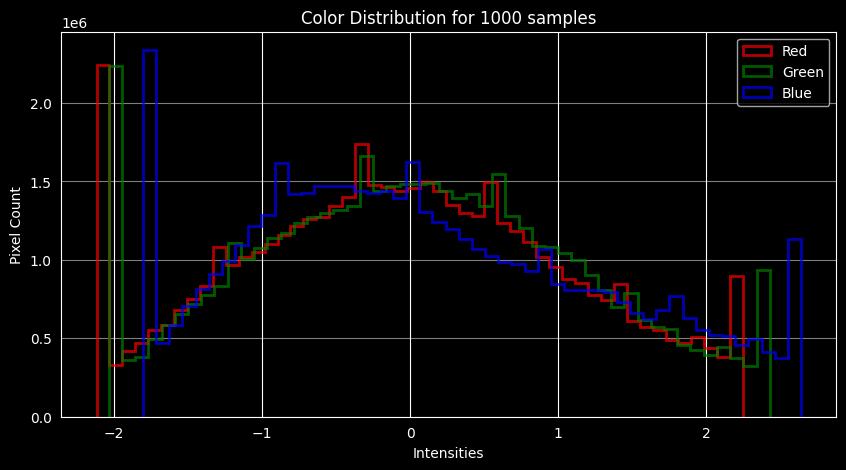

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(red_image, bins=50, color='red', alpha=0.7, histtype='step', label='Red', linewidth=2)
plt.hist(green_image, bins=50, color='green', histtype='step', alpha=0.7, label='Green', linewidth=2)
plt.hist(blue_image, bins=50, color='blue', histtype='step', alpha=0.7, label='Blue', linewidth=2)
plt.title("Color Distribution for 1000 samples")
plt.ylabel("Pixel Count")
plt.xlabel("Intensities")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

  Distribution Characteristics: 
  >This histogram illustrates the distribution of pixel intensities for the Red, Green, and Blue channels across 1,000 random samples. The data has been normalized using standard ImageNet mean and standard deviation values, shifting the original [0, 255] range to an approximate range of [-2, 2.5]. The overlapping bell-shaped curves indicate that the color channels are well-balanced and centered near zero, which is the expected input format for our networks. The spikes at the edges represent the clipped minimum and maximum values (originally 0 and 255) after normalization.

Creating tabular represenation of our data

In [12]:
X_train = pd.DataFrame(X_sample.reshape(1000,-1))
y_train = pd.DataFrame(y_sample, columns=["Labels"])
y_validation = pd.DataFrame(y_val, columns=["Labels"])
y_test_l = pd.DataFrame(y_test, columns=["Lables"])

In [13]:
X_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 150528 entries, 0 to 150527
dtypes: float32(150528)
memory usage: 574.2 MB


We have 1000 rows, and 150528 columns (this corresponds to the width and heigh of each image).

Statistical overview on the numerical data:

In [14]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-1.499581,-1.434986,-1.369998,-1.301413,-1.215173,-1.138111,-1.075537,-1.009145,-0.940012,-0.940081,...,-0.706423,-0.706335,-0.769359,-0.831285,-0.903564,-0.954109,-1.012479,-1.099747,-1.155294,-1.222362
std,1.205329,1.246132,1.285326,1.314456,1.358959,1.387140,1.406377,1.425241,1.435154,1.434169,...,1.312659,1.313431,1.290901,1.276069,1.256150,1.234670,1.216661,1.171497,1.144529,1.097130
min,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,...,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
25%,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,...,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
50%,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-2.117904,-1.818221,-1.835346,...,-1.307712,-1.316427,-1.560436,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444,-1.804444
75%,-1.621286,-1.218854,-0.953421,-0.662300,-0.413991,-0.229900,-0.092902,0.061221,0.211063,0.193938,...,0.182484,0.199913,0.095338,-0.009237,-0.113813,-0.166100,-0.305534,-0.619259,-0.771765,-1.015773
max,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,2.248908,...,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000,2.640000


>The table provides a statistical summary of the flattened pixel features (columns 0–150527). The constant count of 1000 confirms that there are no missing values across the training samples. Notably, the min (~ -2.12) and max (~ 2.25) values, validate that the data has been standardized. This confirms the pixel intensities have been rescaled from their original 0–255 integer range into a normalized distribution, which is necessary for the stability of the machine learning model.

In [15]:
X_train.isnull().sum().sum()

np.int64(0)

>There are no null values for each column in our DataFrame.

Here we have the label distribution for our training/validation/test datasets:

In [16]:
train_counts = y_train.value_counts()
val_counts = y_validation.value_counts()
test_counts = y_test_l.value_counts()

Creating a mapping between our labels and their quantity in the appropriate loader:

In [17]:
train_indexes = train_counts.index
train_dict = {cifar10_labels[x[0]]: y for x, y in zip(train_indexes, train_counts)}

val_indexes = val_counts.index
val_dict = {cifar10_labels[x[0]]: y for x, y in zip(val_indexes, val_counts)}

test_indexes = test_counts.index
test_dict = {cifar10_labels[x[0]]: y for x, y in zip(test_indexes, test_counts)}

/tmp/ipykernel_1231149/979364037.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


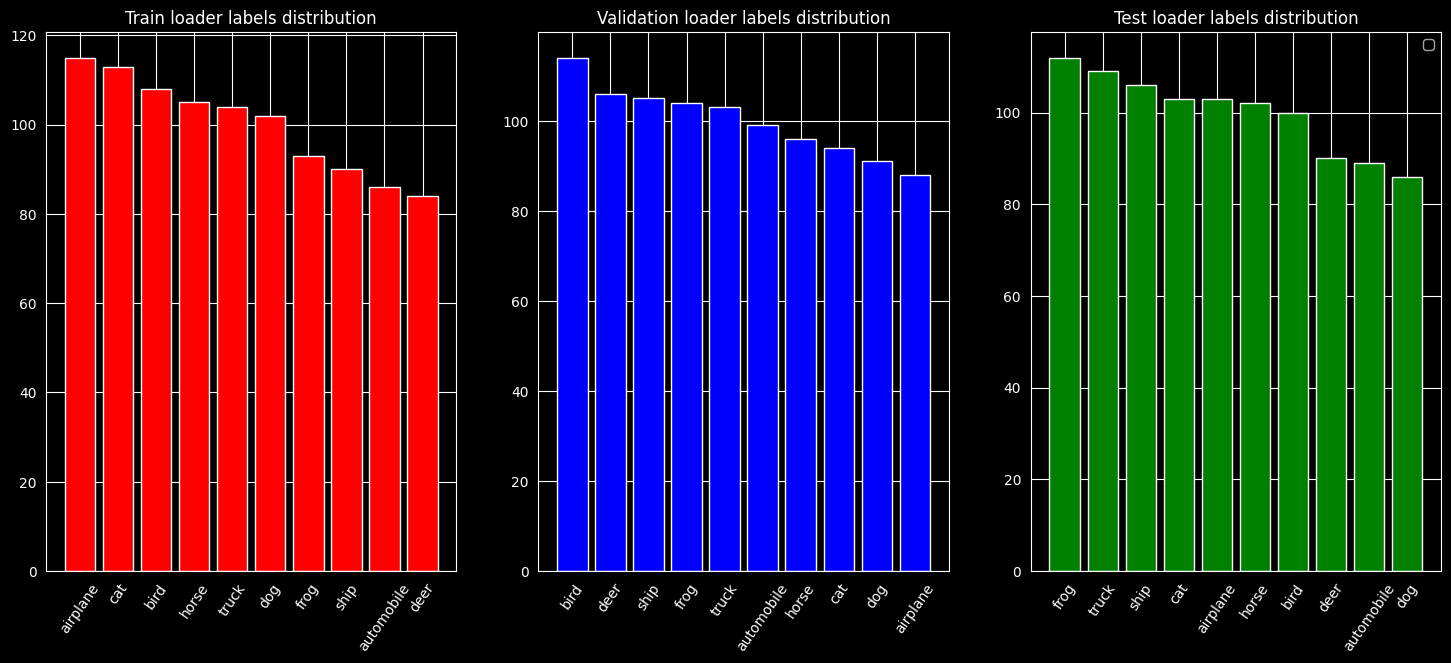

In [18]:

plt.figure(figsize=(18,7))
#plt.title("Classes and quantities of their instances in train/validation/test loaders")
plt.axis("off")
plt.subplot(1,3,1)
plt.bar(train_dict.keys(),train_dict.values(), color="red")
plt.title("Train loader labels distribution")
plt.xticks(rotation=55)
plt.subplot(1,3,2)
plt.bar(val_dict.keys(), val_dict.values(), color="blue")
plt.title("Validation loader labels distribution")
plt.xticks(rotation=55)
plt.subplot(1,3,3)
plt.bar(test_dict.keys(), test_dict.values(), color="green")
plt.title("Test loader labels distribution")
plt.xticks(rotation=55)
plt.legend()
plt.show()

>The target variables of each loader consist of 10 distinct classes (labels 0–9). The class frequencies are relatively balanced, ranging from a maximum to minimum samples. While for the train and validation loaders the "bird" and "deer" classes have the most number of instances, for the test loader they are only in the 7-th and 8-th positions respectively.

### Analytics of the raw data

Loading the training and test data for further visualization:

In [3]:
train_dataset = torchvision.datasets.CIFAR10("./data", train=True, download = True)
test_dataset = torchvision.datasets.CIFAR10("./data", train=False, download = True)

100%|██████████| 170498071/170498071 [00:22<00:00, 7748426.36it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Converting data/labels for each dataset to a numpy object for faster computation purposes:

In [150]:
train_data = np.array(train_dataset.data, dtype= np.float32)
train_data_labels = np.array(train_dataset.targets)
test_data = np.array(test_dataset.data)
test_data_labels = np.array(test_dataset.targets)

In [2]:

print(f"The shape of the train data is {train_data.shape} and the shape of the training labels is {train_data_labels.shape}\n")
print(f"The shape of the test data is {test_data.shape} and the labels in the test set are {test_data_labels.shape}")

NameError: name 'train_data' is not defined

Visual differences between the original image and the transformed image:

In [176]:
raw_examples = train_data[:5,:,:,:]
proccesed_examples = X_sample[:5,:,:,:]


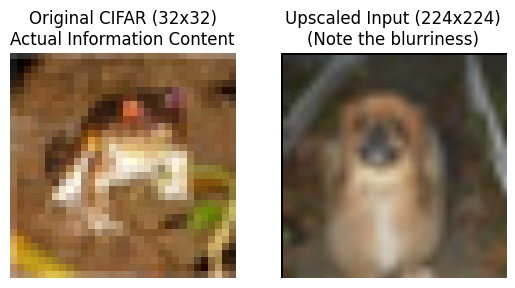

In [175]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(raw_examples[0])
ax[0].set_title(f"Original CIFAR (32x32)\nActual Information Content")


processed_img = proccesed_examples[0].permute(1, 2, 0).numpy()
processed_img = (std * (processed_img ) + mean)

ax[1].imshow(processed_img)
ax[1].set_title(f"Upscaled Input (224x224)\n(Note the blurriness)")

for a in ax:
    a.axis('off')
plt.show()

>By means of blurring we reduce the sharp lines and corners on the original picture, consequently our model will better learn the visual pattern.

Creating 1D array with the appropriate values of RGB pixels:

In [19]:
red_before_scaling = train_data[:, :, :, 0].flatten()
green_before_scaling = train_data[:, :, :, 1].flatten()
blue_before_scaling = train_data[:, :, :, 2].flatten()

Plotting our data before Normalization:

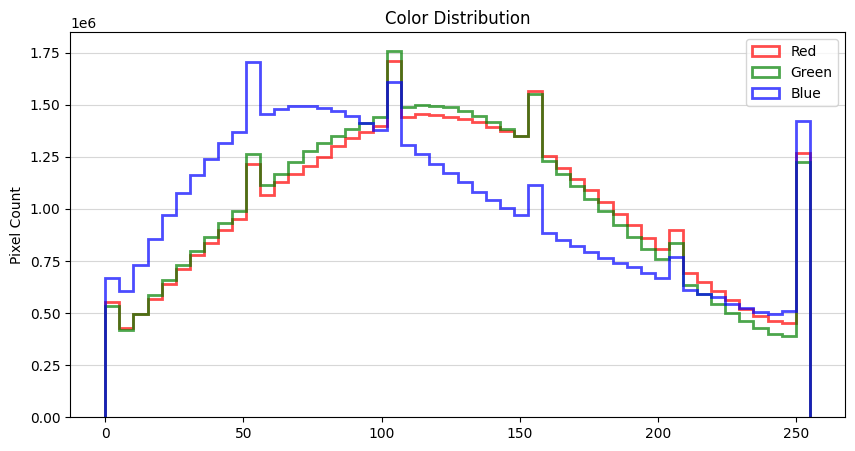

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(red_before_scaling, bins=50, color='red', alpha=0.7, histtype='step', label='Red', linewidth=2)
plt.hist(green_before_scaling, bins=50, color='green', histtype='step', alpha=0.7, label='Green', linewidth=2)
plt.hist(blue_before_scaling, bins=50, color='blue', histtype='step', alpha=0.7, label='Blue', linewidth=2)
plt.title("Color Distribution")
plt.ylabel("Pixel Count")
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

**Graph Overview:**
1. This is an RGB Histogram.

2.   X-Axis: Represents Pixel Intensity, ranging from $0$ (absolute black) to $255$ (absolute white/brightest color).
3.   Y-Axis: Represents Pixel Count, showing how frequently each intensity value appears in the image.The scale goes up to roughly $1.75 \times 10^6$ pixels.

4.  Series: Three step-plots representing the Red, Green, and Blue color channels.

<br>

Our data is mostly balanced. We can spot that the quantity of pixels with the biggest intensity is approximately the same for each color channel. In the middle part of the graph, red and green pixels are characterized by similar trends, while the blue ones are shifted to the left (we will have many dark blue pixels).


## **Normalization of our data**

**Normalization** is a technique used to rescale the values of a dataset so that they end up within a specific, fixed range: usually between 0 and 1.

<br>

![image.png](https://media.licdn.com/dms/image/v2/C4E12AQFPqF6qfXYOvQ/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1624324925880?e=2147483647&v=beta&t=mOjcj9nj-WxLv26l9tmdqCTydSINEjX3YEENq_38bdM)



<br>
   
**The minimum value and the maximum value of the pixels is 0 and 255 respectively**


In [151]:
train_data = (train_data - 0) / (255 - 0)

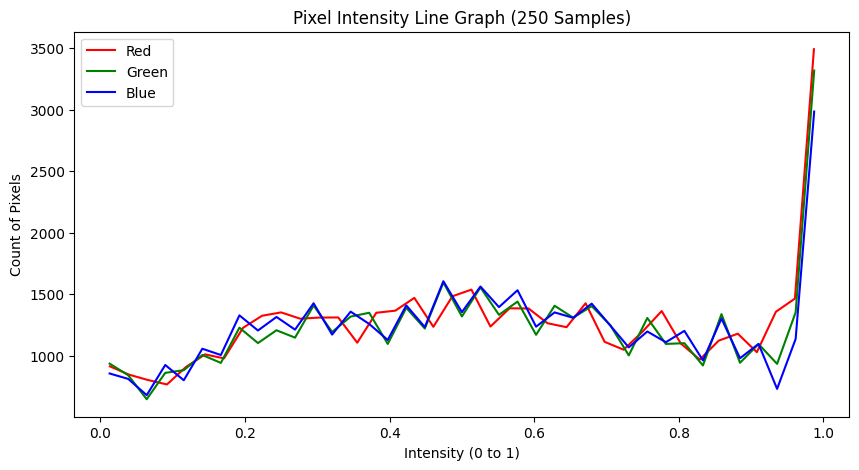

In [ ]:
N = 500
sample_indices = train_data[:N, :]
sample_data = sample_indices.reshape(N, 32, 32, 3)
red =  sample_data[0:500, 0, :, :].flatten()
green = sample_data[0:500, 1, :, :].flatten()
blue = sample_data[0:500, 2, :, :].flatten()

plt.figure(figsize=(10, 5))

# element="poly" turns the bars into a single connected line automatically
sb.histplot(red, color="red", label="Red", element="poly", fill=False)
sb.histplot(green, color="green", label="Green", element="poly", fill=False)
sb.histplot(blue, color="blue", label="Blue", element="poly", fill=False)

plt.xlabel("Intensity (0 to 1)")
plt.title(f"Pixel Intensity Line Graph ({N} Samples)")
plt.ylabel("Count of Pixels")
plt.legend()
plt.show()


In [25]:
train_data = torch.from_numpy(train_data)

Creating a tabular representation of our data for analytic purposes ( .describe() and .info() methods)

In [28]:
train_data = train_data.reshape(train_data.shape[0], -1)
x = pd.DataFrame(train_data)
x.head(5)


,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313726,0.337255,0.329412
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313726


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 3072 entries, 0 to 3071
dtypes: float32(3072)
memory usage: 585.9 MB


In [32]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.512591,0.533554,0.519819,0.510354,0.531147,0.517073,0.513923,0.534299,0.519927,0.515956,...,0.446580,0.497170,0.492930,0.446395,0.496333,0.492617,0.446691,0.496624,0.493531,0.448556
std,0.287891,0.285908,0.315486,0.284082,0.281972,0.312143,0.283296,0.281081,0.311510,0.282423,...,0.253872,0.250805,0.241533,0.254488,0.251683,0.242471,0.255733,0.254614,0.245685,0.259126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278431,0.301961,0.239216,0.278431,0.305882,0.239216,0.286275,0.309804,0.243137,0.286275,...,0.250980,0.309804,0.317647,0.250980,0.309804,0.317647,0.250980,0.305882,0.313726,0.247059
50%,0.501961,0.529412,0.498039,0.498039,0.529412,0.498039,0.505882,0.533333,0.501961,0.509804,...,0.415686,0.486275,0.482353,0.415686,0.486275,0.482353,0.415686,0.486275,0.482353,0.415686
75%,0.741176,0.764706,0.811765,0.737255,0.756863,0.807843,0.737255,0.760784,0.807843,0.737255,...,0.615686,0.674510,0.654902,0.615686,0.674510,0.654902,0.615686,0.674510,0.658824,0.619608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
x.isnull().sum().sum()

np.int64(0)

 No null values or missing ones were found.

In [42]:
train_labels = pd.DataFrame(train_data_labels, columns=["Label"])

In [43]:
train_labels.head()

,Label
0,6
1,9
2,9
3,4
4,1


In [44]:
train_labels.value_counts()

,count
Label,
0,5000
1,5000
2,5000
3,5000
4,5000
5,5000
6,5000
7,5000
8,5000


At this step we notice that we have the same amount of instances for each class, but in reality when we take a look at the train_loader, we will see that the amount of labels for each class is not equal. The reason for this is that after we load the train data, it is randomly split into train and validation sets, which means, that some labels randomly move to the training and validation sets.

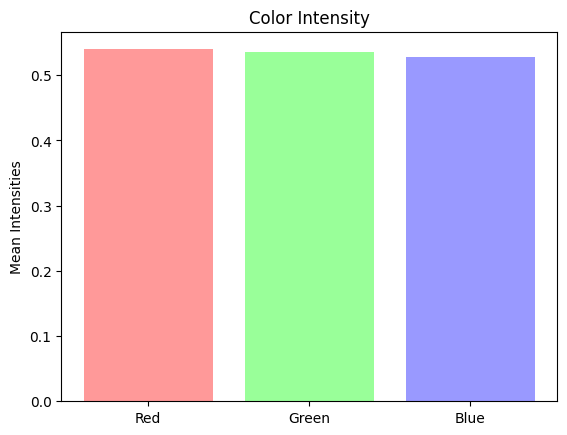

In [36]:
red_count = np.abs(red.mean())
blue_count = np.abs(blue.mean())
green_count = np.abs(green.mean())

plt.bar( x=["Red","Green", "Blue"],height=[red_count,green_count,blue_count], color=["#ff9999", "#99ff99", "#9999ff"])

plt.xticks()
plt.ylabel("Mean Intensities")
plt.title("Color Intensity")
plt.show()

Moreover, our dataset did not have any categorical columns, so we can avoid using OneHotEncoder.